In [11]:
# ==========================================
# TASK 1: DATA IMMERSION & WRANGLING
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------
# 1. Load RAW Dataset
# ------------------------------------------
df = pd.read_excel("/content/Online_Retail.xlsx")

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

# ------------------------------------------
# 2. Data Quality Assessment
# ------------------------------------------

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nDuplicate Records Count:")
print(df.duplicated().sum())

# ------------------------------------------
# 3. Data Cleaning
# ------------------------------------------

# 3.1 Remove duplicate rows
df_cleaned = df.drop_duplicates()

# 3.2 Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# ------------------------------------------
# 4. Data Transformation
# ------------------------------------------

# Convert InvoiceDate to datetime
df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])

# Create Total Sales (Revenue) column
df_cleaned["Total_Sales"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

print("\nCleaned Dataset Shape:", df_cleaned.shape)

print("\nCleaned Dataset Preview:")
print(df_cleaned.head())

# ------------------------------------------
# 5. Save CLEANED Dataset
# ------------------------------------------

# Save as Excel
df_cleaned.to_excel("/content/cleaned_data.xlsx", index=False)

# Save as CSV (for Task-2 EDA)
df_cleaned.to_csv("/content/cleaned_data.csv", index=False)

print("\n✅ Cleaned dataset saved successfully!")
print("Files created:")
print(" - /content/cleaned_data.xlsx")
print(" - /content/cleaned_data.csv")


Dataset Shape: (541909, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

First 5 Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CR

Dataset Shape: (401604, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   Total_Sales  401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.6+ MB
None

First 5 Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3   

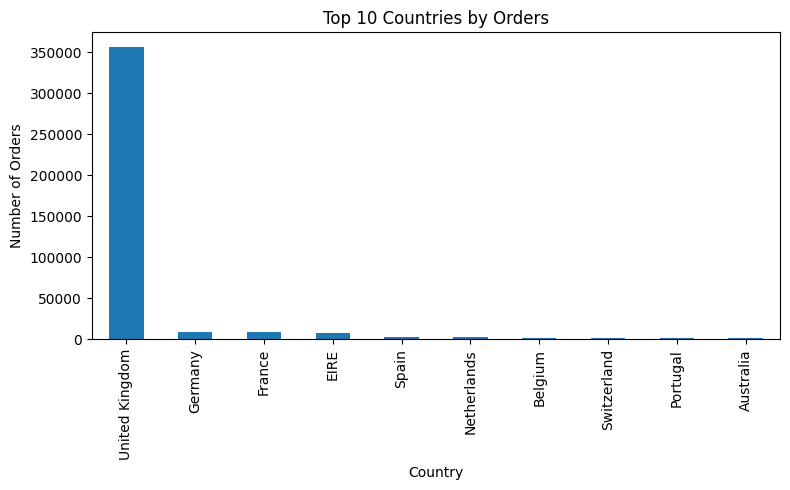

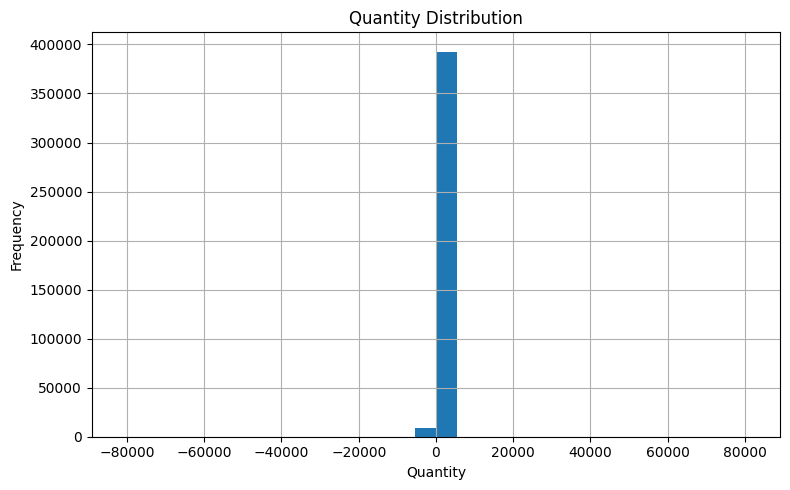

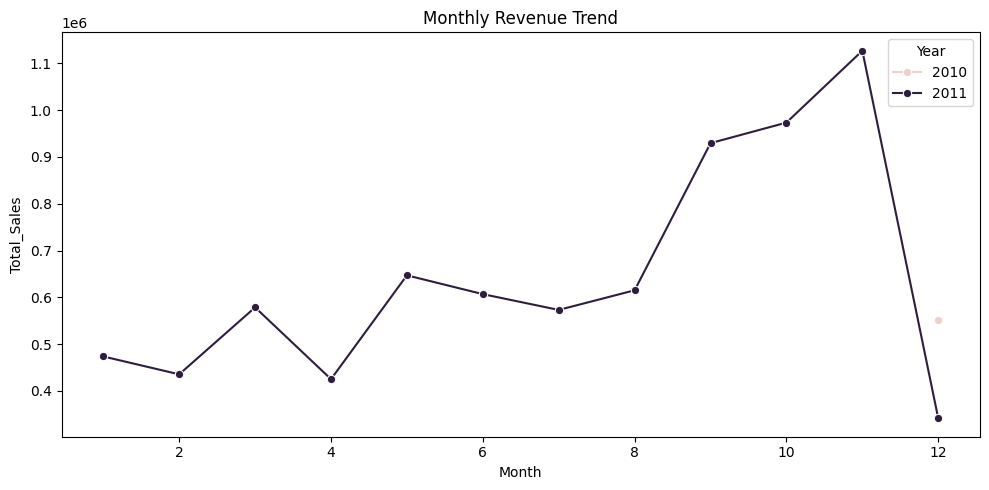

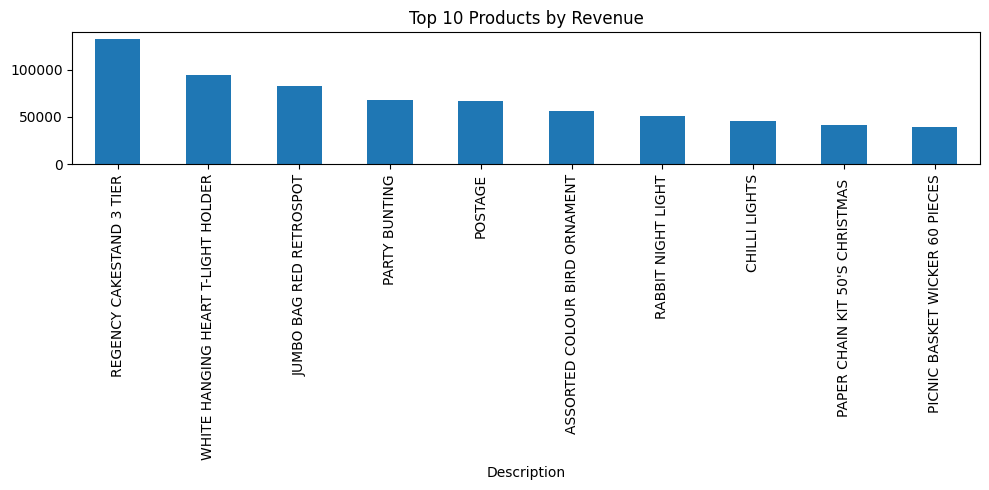

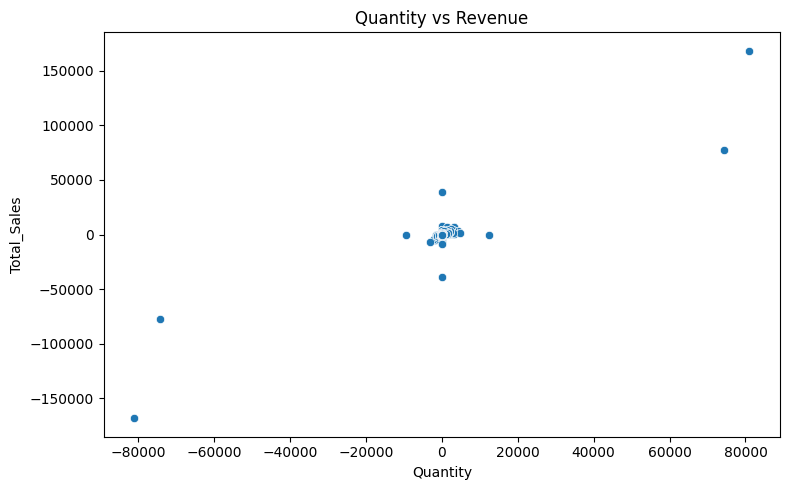

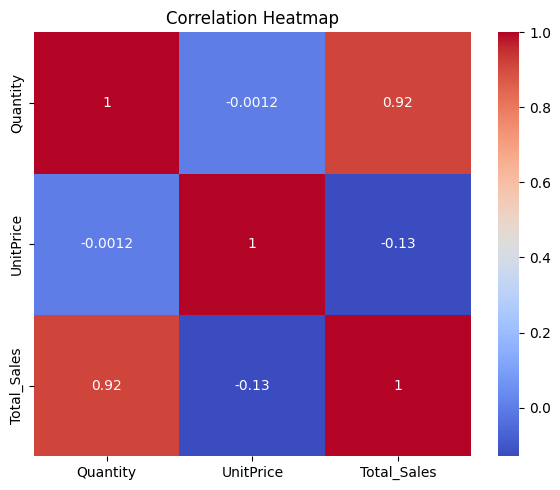


Top 5 Countries by Revenue:
Country
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Name: Total_Sales, dtype: float64

✅ Task-2 EDA Completed Successfully!


In [13]:
# ==========================================
# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
# ApexPlanet Data Analytics Internship
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# 1. Load Dataset
# ------------------------------------------

df = pd.read_csv("/content/cleaned_data.csv")

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

# ------------------------------------------
# 2. Data Cleaning & Feature Engineering
# ------------------------------------------

# Convert to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract Year & Month
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# ------------------------------------------
# 3. KPI Metrics
# ------------------------------------------

total_revenue = df["Total_Sales"].sum()
total_orders = df["InvoiceNo"].nunique()
total_customers = df["CustomerID"].nunique()
avg_order_value = df["Total_Sales"].mean()

print("\n========== KPI SUMMARY ==========")
print("Total Revenue:", round(total_revenue,2))
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Average Order Value:", round(avg_order_value,2))

# ------------------------------------------
# 4. Univariate Analysis
# ------------------------------------------

# Top 10 Countries by Orders
plt.figure(figsize=(8,5))
df["Country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries by Orders")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# Quantity Distribution
plt.figure(figsize=(8,5))
df["Quantity"].hist(bins=30)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ------------------------------------------
# 5. Multivariate Analysis
# ------------------------------------------

# Monthly Revenue Trend (Year + Month)
monthly_revenue = df.groupby(["Year","Month"])["Total_Sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x="Month", y="Total_Sales", hue="Year", marker="o")
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()

# Top 10 Products by Revenue
top_products = df.groupby("Description")["Total_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.tight_layout()
plt.show()

# Quantity vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x="Quantity", y="Total_Sales", data=df)
plt.title("Quantity vs Revenue")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Quantity","UnitPrice","Total_Sales"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ------------------------------------------
# 6. Business Insights
# ------------------------------------------

top_countries = df.groupby("Country")["Total_Sales"].sum().sort_values(ascending=False).head(5)

print("\nTop 5 Countries by Revenue:")
print(top_countries)

# ------------------------------------------
# 7. Save Summary
# ------------------------------------------

summary_table = df.groupby("Country")["Total_Sales"].sum().reset_index()
summary_table.to_csv("eda_summary_by_country.csv", index=False)

print("\n✅ Task-2 EDA Completed Successfully!")

In [16]:
# ==========================================
# TASK 2 - FULL SQL IMPLEMENTATION
# Dataset Path: /content/cleaned_data.csv
# ==========================================

import pandas as pd
import sqlite3

# ------------------------------------------
# 1. Load CSV
# ------------------------------------------

df = pd.read_csv("/content/cleaned_data.csv")

# Basic Cleaning (Professional Step)
df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

if "Total_Sales" not in df.columns:
    df["Total_Sales"] = df["Quantity"] * df["UnitPrice"]

# ------------------------------------------
# 2. Create SQLite Database
# ------------------------------------------

conn = sqlite3.connect("sales_database.db")
cursor = conn.cursor()

df.to_sql("sales", conn, if_exists="replace", index=False)

print("✅ Table 'sales' created successfully")

# ------------------------------------------
# 3. BUSINESS SQL QUERIES
# ------------------------------------------

queries = {

"Top 5 Countries by Revenue":
"""
SELECT Country,
       SUM(Total_Sales) AS Total_Revenue
FROM sales
GROUP BY Country
ORDER BY Total_Revenue DESC
LIMIT 5;
""",

"Top 10 Products by Revenue":
"""
SELECT Description,
       SUM(Total_Sales) AS Revenue
FROM sales
GROUP BY Description
ORDER BY Revenue DESC
LIMIT 10;
""",

"Monthly Revenue Trend":
"""
SELECT strftime('%Y', InvoiceDate) AS Year,
       strftime('%m', InvoiceDate) AS Month,
       SUM(Total_Sales) AS Monthly_Revenue
FROM sales
GROUP BY Year, Month
ORDER BY Year, Month;
""",

"Total Orders per Country":
"""
SELECT Country,
       COUNT(DISTINCT InvoiceNo) AS Total_Orders
FROM sales
GROUP BY Country
ORDER BY Total_Orders DESC;
""",

"Average Order Value":
"""
SELECT AVG(Total_Sales) AS Avg_Order_Value
FROM sales;
""",

"Top 5 Customers by Spending":
"""
SELECT CustomerID,
       SUM(Total_Sales) AS Total_Spent
FROM sales
GROUP BY CustomerID
ORDER BY Total_Spent DESC
LIMIT 5;
""",

"Products with Highest Quantity Sold":
"""
SELECT Description,
       SUM(Quantity) AS Total_Quantity
FROM sales
GROUP BY Description
ORDER BY Total_Quantity DESC
LIMIT 10;
"""
}

# ------------------------------------------
# 4. Execute All Queries
# ------------------------------------------

for title, query in queries.items():
    print("\n====================================")
    print(title)
    print("====================================")

    result = pd.read_sql(query, conn)
    display(result)

# ------------------------------------------
# 5. Close Connection
# ------------------------------------------

conn.close()
print("\n✅ All queries executed successfully")

✅ Table 'sales' created successfully

Top 5 Countries by Revenue


,Country,Total_Revenue
0,United Kingdom,7.285025e+06
1,Netherlands,2.854463e+05
2,EIRE,2.652625e+05
3,Germany,2.286784e+05
4,France,2.089343e+05



Top 10 Products by Revenue


,Description,Revenue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142264.75
2,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
3,JUMBO BAG RED RETROSPOT,85040.54
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68785.23
7,ASSORTED COLOUR BIRD ORNAMENT,56413.03
8,Manual,53419.93
9,RABBIT NIGHT LIGHT,51251.24



Monthly Revenue Trend


,Year,Month,Monthly_Revenue
0,2010,12,570422.730
1,2011,01,568101.310
2,2011,02,446084.920
3,2011,03,594081.760
4,2011,04,468374.331
5,2011,05,677355.150
6,2011,06,660046.050
7,2011,07,598962.901
8,2011,08,644051.040
9,2011,09,950690.202



Total Orders per Country


,Country,Total_Orders
0,United Kingdom,16646
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,94
6,Spain,90
7,Portugal,57
8,Australia,57
9,Switzerland,51



Average Order Value


,Avg_Order_Value
0,22.6315



Top 5 Customers by Spending


,CustomerID,Total_Spent
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17



Products with Highest Quantity Sold


,Description,Total_Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3,JUMBO BAG RED RETROSPOT,46078
4,WHITE HANGING HEART T-LIGHT HOLDER,36706
5,ASSORTED COLOUR BIRD ORNAMENT,35263
6,PACK OF 72 RETROSPOT CAKE CASES,33670
7,POPCORN HOLDER,30919
8,RABBIT NIGHT LIGHT,27153
9,MINI PAINT SET VINTAGE,26076



✅ All queries executed successfully
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
